In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# $\star$ Question 1:
Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
{1,2,3}. 

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the average
classification error using the true labels of the test set. 

Visualize the
training points and the classified points and mark misclassifications. Do
the same for different k.

# $\star$ Question 2:
Do the same as above for different splits of the set into training and
test set. 

Is the classification error always the same? 

Compute the mean and the variance of the classification error over multiple splits. 

How are the mean and the variance affected by k? 

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

# Hints

## Example output for Question 1

![example output](ex4_example_output.jpg)

## Contour plots

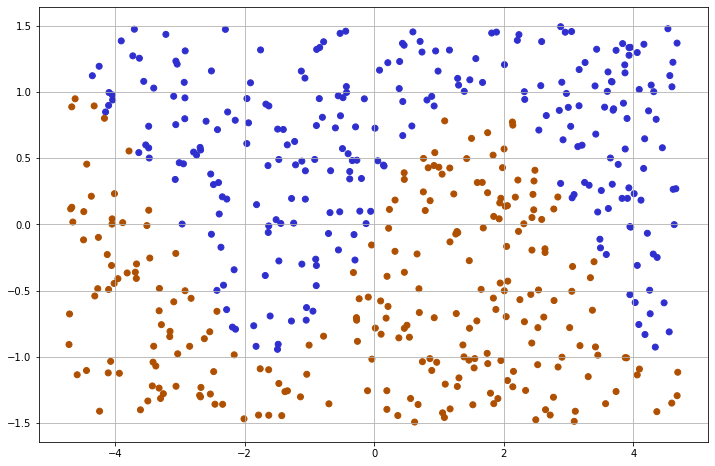

In [2]:
# create custom colormaps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

# create some example data in sine form
data = np.random.uniform(-1.5, 1.5, size=(500,2))
data[:, 0] *= 3.14
x, y = data[:, 0], data[:, 1]

# set data classes with sine as border
y_border = np.sin(data[:, 0])
classes = (y > y_border).astype(float)

# plot points colored by classes with the created colormap
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()




xrange.shape=(480,), yrange.shape=(160,)
xx.shape=(160, 480), yy.shape=(160, 480)


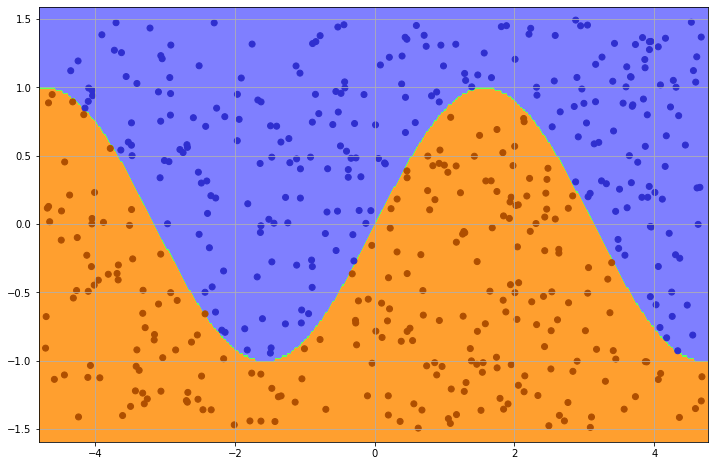

In [3]:
# create a meshgrid depending on data range
bordersize = .1
x_min, x_max = x.min() - bordersize, x.max() + bordersize
y_min, y_max = y.min() - bordersize, y.max() + bordersize

grid_size = .02
xrange = np.arange(x_min, x_max, grid_size)
yrange = np.arange(y_min, y_max, grid_size)
print(f"{xrange.shape=}, {yrange.shape=}")

xx, yy = np.meshgrid(xrange, yrange)
print(f"{xx.shape=}, {yy.shape=}")

# now xx maps from pixel position i, j to position x in the data

# classify each point in the meshgrid
zz = (yy > np.sin(xx)).astype(float)

# plot the contour of the true class distribution and the samples
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, zz, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()


## Data shapes

The sklearn predictor expects input of shape `(datapoints, features)`. To input your meshgrid, use `np.reshape` to flatten both `xx` and `yy` and then use `np.stack` to stack them in the last axis. Finally `reshape` the predictor's output back to your meshgrid shape and you can plot the contour.
